<a href="https://colab.research.google.com/github/DivjotBanga/DivjotBanga.github.io/blob/master/IT684Final_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls -lrt "/content/drive/My Drive/data_analysis/CharlesBookClub (1).csv"

-rw------- 1 root root 235900 Jul  8 07:31 '/content/drive/My Drive/data_analysis/CharlesBookClub (1).csv'


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv("/content/drive/My Drive/data_analysis/CharlesBookClub (1).csv")

Data Check

In [8]:
#Original Dataset Shape
df.shape

(4000, 24)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Seq#              4000 non-null   int64
 1   ID#               4000 non-null   int64
 2   Gender            4000 non-null   int64
 3   M                 4000 non-null   int64
 4   R                 4000 non-null   int64
 5   F                 4000 non-null   int64
 6   FirstPurch        4000 non-null   int64
 7   ChildBks          4000 non-null   int64
 8   YouthBks          4000 non-null   int64
 9   CookBks           4000 non-null   int64
 10  DoItYBks          4000 non-null   int64
 11  RefBks            4000 non-null   int64
 12  ArtBks            4000 non-null   int64
 13  GeogBks           4000 non-null   int64
 14  ItalCook          4000 non-null   int64
 15  ItalAtlas         4000 non-null   int64
 16  ItalArt           4000 non-null   int64
 17  Florence          4000 non-null  

In [10]:
df.describe()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,16594.623000,0.704500,208.091500,13.390500,3.833250,26.50725,0.639750,0.30475,0.731250,0.350750,0.256250,0.28900,0.387500,0.125250,0.037500,0.045750,0.084500,0.885000,4.281250,3.170000,2.085750,0.084500,0.915500
std,1154.844867,9484.433792,0.456324,100.948548,8.103822,3.458386,18.35138,0.994343,0.61194,1.089413,0.687999,0.558269,0.60089,0.750656,0.385486,0.214721,0.220611,0.278171,1.226234,0.915619,0.928071,0.831907,0.278171,0.278171
min,1.000000,25.000000,0.000000,15.000000,2.000000,1.000000,2.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1000.750000,8253.250000,0.000000,129.000000,8.000000,1.000000,12.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,1.000000,0.000000,1.000000
50%,2000.500000,16581.000000,1.000000,208.000000,12.000000,2.000000,20.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,2.000000,0.000000,1.000000
75%,3000.250000,24838.250000,1.000000,283.000000,16.000000,6.000000,36.00000,1.000000,0.00000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,4.000000,3.000000,0.000000,1.000000
max,4000.000000,32977.000000,1.000000,479.000000,36.000000,12.000000,99.00000,7.000000,5.00000,7.000000,5.000000,4.000000,5.00000,6.000000,3.000000,2.000000,2.000000,1.000000,8.000000,5.000000,4.000000,3.000000,1.000000,1.000000


In [11]:
#checking duplicates
sum(df.duplicated(subset='ID#')) == 0

True

Data Cleaniing

In [12]:
#Total Null values
print(df.isnull().values.sum())

0


In [13]:
data_numeric = df.select_dtypes(include=['float64', 'int64'])


In [14]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
Seq#,1.000000,0.999921,-0.026506,-0.029390,0.012711,-0.013423,-0.007475,0.014387,-0.028946,-0.010129,0.009465,-0.028485,-0.014136,-0.000956,-0.003101,0.000455,-0.010484,-0.018865,-0.010294,-0.029998,0.014065,-0.024073,-0.018865,0.018865
ID#,0.999921,1.000000,-0.026276,-0.029619,0.012420,-0.013520,-0.007699,0.014241,-0.029291,-0.010053,0.009639,-0.028546,-0.014117,-0.000950,-0.003318,0.000490,-0.010771,-0.018829,-0.010394,-0.030301,0.014018,-0.024205,-0.018829,0.018829
Gender,-0.026506,-0.026276,1.000000,-0.011231,0.004569,0.001252,0.004645,-0.003756,0.010938,0.020793,-0.006701,-0.035448,-0.024078,0.018999,-0.035474,-0.011931,0.000190,-0.059338,-0.013375,-0.012905,0.010002,-0.010305,-0.059338,0.059338
M,-0.029390,-0.029619,-0.011231,1.000000,0.007779,0.509035,0.434561,0.358133,0.286340,0.369060,0.275389,0.250838,0.074617,0.348304,0.074979,0.141313,0.135598,0.034561,0.322495,0.852379,0.008581,0.406889,0.034561,-0.034561
R,0.012711,0.012420,0.004569,0.007779,1.000000,0.002797,0.448581,0.138025,0.068426,0.155865,0.105360,0.110035,0.033409,0.064075,0.055342,0.001067,0.060360,-0.059679,0.084040,0.006864,0.784557,-0.000480,-0.059679,0.059679
F,-0.013423,-0.013520,0.001252,0.509035,0.002797,1.000000,0.832149,0.676616,0.538481,0.716067,0.565413,0.483482,0.169759,0.375900,0.136091,0.254919,0.237463,0.079634,0.443442,0.352331,-0.005657,0.795994,0.079634,-0.079634
FirstPurch,-0.007475,-0.007699,0.004645,0.434561,0.448581,0.832149,1.000000,0.629666,0.479589,0.684791,0.536704,0.456534,0.163447,0.344532,0.145914,0.207257,0.231697,0.035297,0.414850,0.302350,0.354142,0.686685,0.035297,-0.035297
ChildBks,0.014387,0.014241,-0.003756,0.358133,0.138025,0.676616,0.629666,1.000000,0.280748,0.402993,0.314880,0.269048,0.075103,0.223254,0.115789,0.140590,0.175468,0.016060,0.266057,0.239582,0.164204,0.525870,0.016060,-0.016060
YouthBks,-0.028946,-0.029291,0.010938,0.286340,0.068426,0.538481,0.479589,0.280748,1.000000,0.327690,0.236058,0.189312,0.078008,0.220819,0.071364,0.129959,0.122680,0.032310,0.240666,0.199565,0.089282,0.420704,0.032310,-0.032310
CookBks,-0.010129,-0.010053,0.020793,0.369060,0.155865,0.716067,0.684791,0.402993,0.327690,1.000000,0.333651,0.294996,0.078949,0.234097,0.156987,0.176720,0.167704,-0.005085,0.292461,0.262060,0.170843,0.571478,-0.005085,0.005085


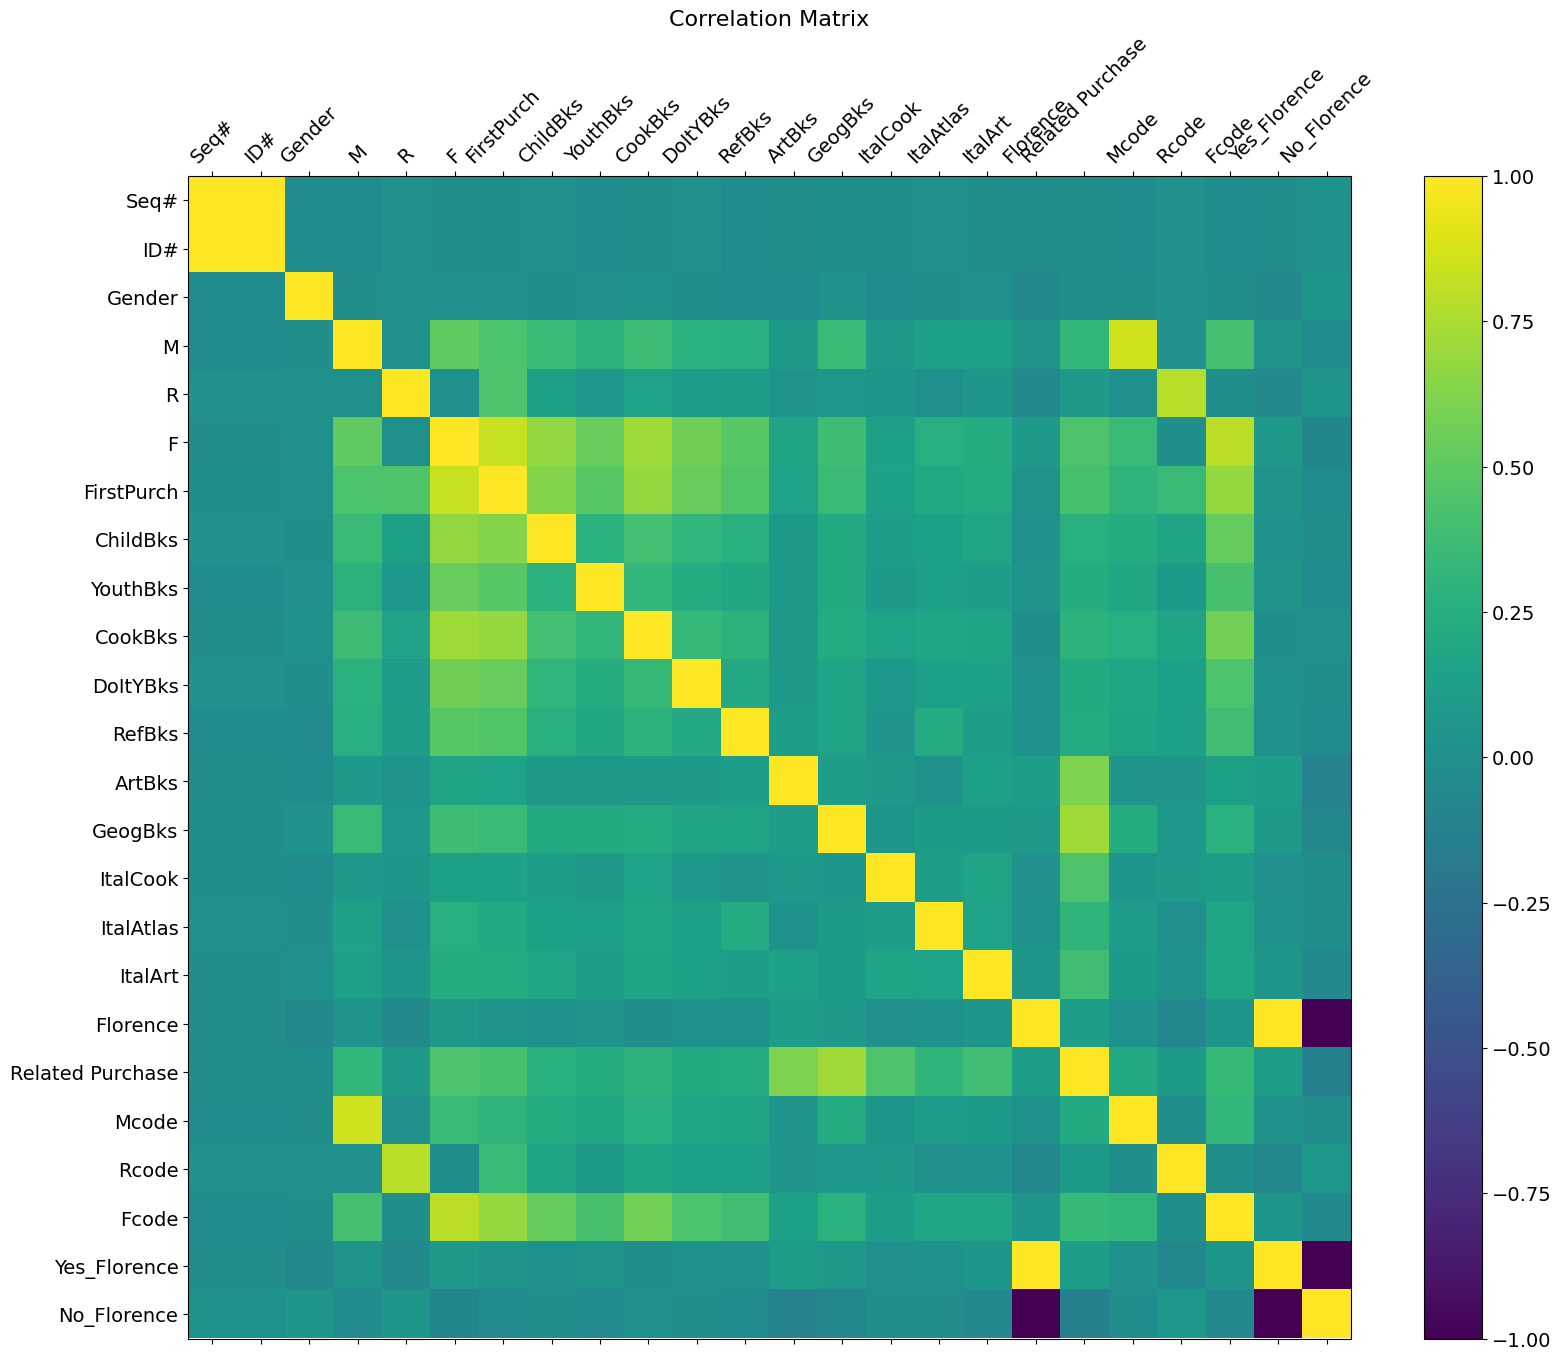

In [15]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

since mcode, rcode, fcode are similar to m, r,f can be removed

In [16]:
data_numeric_limited = data_numeric[['M', 'R', 'F']]

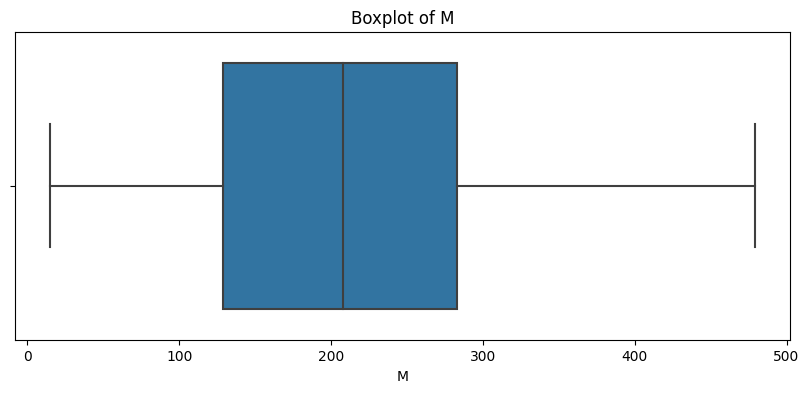

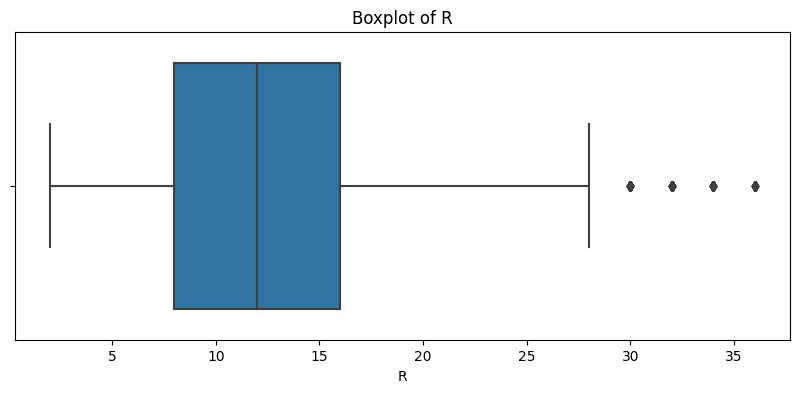

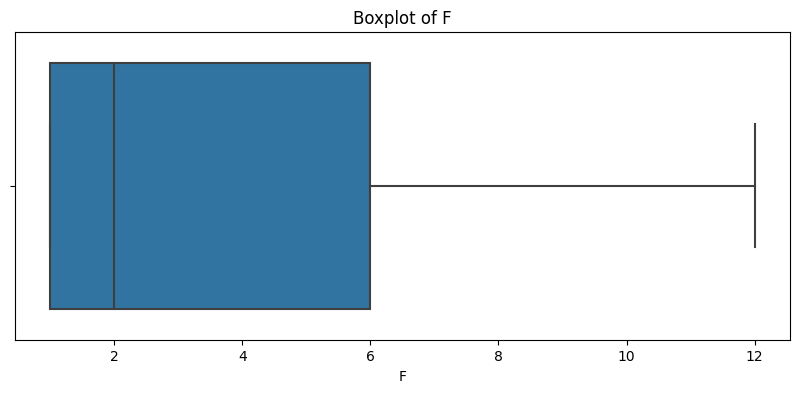

In [17]:
for column in data_numeric_limited.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data_numeric_limited[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [18]:
# Calculate the response rate for the whole training data
response_rate = df['Florence'].mean()
print(f'Response rate for the whole training data: {response_rate * 100:.2f}%')


Response rate for the whole training data: 8.45%


In [19]:
# Function to plot response rate by a variable
def plot_response_rate(df, variable):
    response_rates = df.groupby(variable)['Florence'].mean()
    response_rates.plot(kind='bar', ylim=(0, 1))
    plt.ylabel('Response Rate')
    plt.title(f'Response Rate by {variable}')
    plt.show()


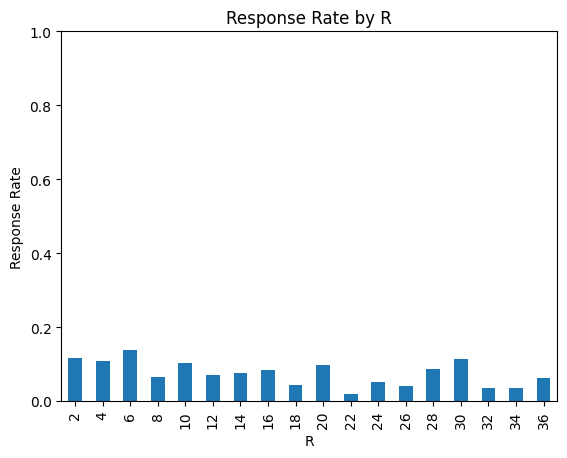

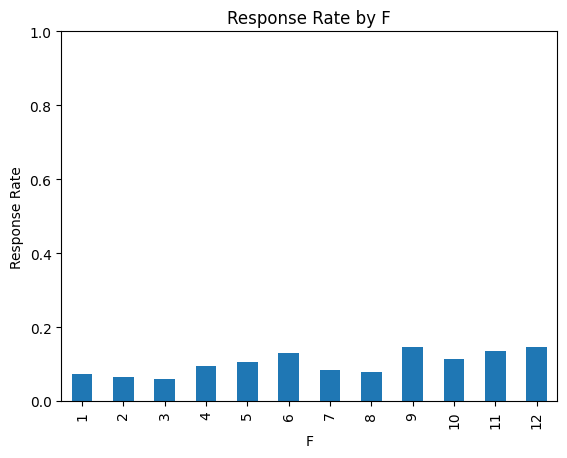

In [20]:
for variable in ['R',  'F']:
    plot_response_rate(df, variable)

The response rate for the whole training data is: 0.0845


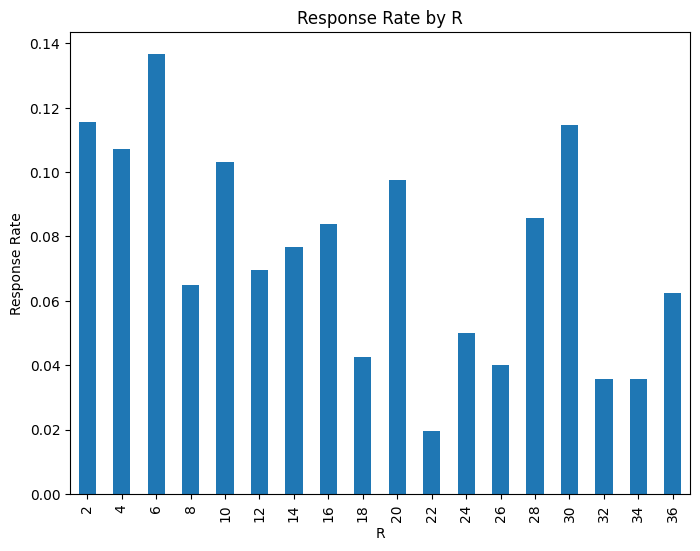

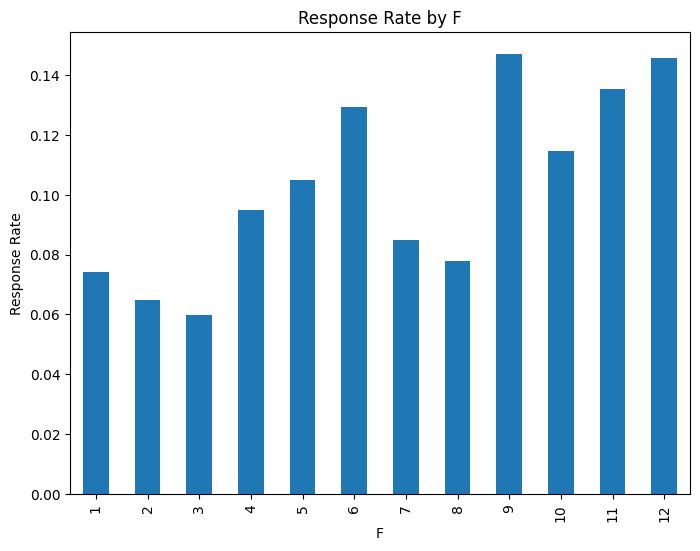

In [21]:
# Calculate the response rate for the whole training data
response_rate = df['Florence'].mean()
print(f'The response rate for the whole training data is: {response_rate}')

# Plot the response rate by the Recency, Monetary, and Frequency variables
variables = ['R', 'F']

for var in variables:
    # Group by the variable and calculate the mean response
    response_by_var = df.groupby(var)['Florence'].mean()

    # Plot
    plt.figure(figsize=(8, 6))
    response_by_var.plot(kind='bar')
    plt.ylabel('Response Rate')
    plt.title(f'Response Rate by {var}')
    plt.show()

In [22]:
df['M_bins'] = pd.cut(df['M'], bins=range(0, df['M'].max() + 25, 25), include_lowest=True)

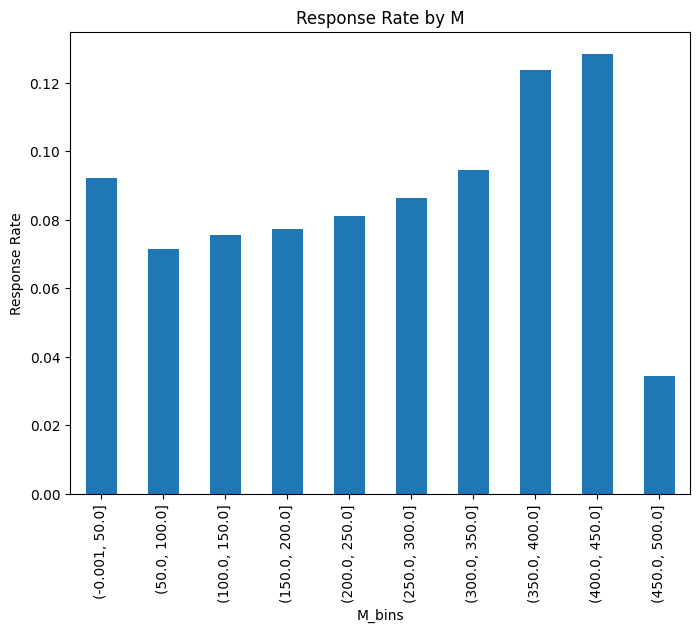

In [23]:
df['M_bins'] = pd.cut(df['M'], bins=range(0, df['M'].max() + 50, 50), include_lowest=True)
response_by_var = df.groupby('M_bins')['Florence'].mean()

# Plot
plt.figure(figsize=(8, 6))
response_by_var.plot(kind='bar')
plt.ylabel('Response Rate')
plt.title(f'Response Rate by M')
plt.show()

In [24]:
df

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence,M_bins
0,1,25,1,297,14,2,22,0,1,1,0,0,0,0,0,0,0,0,0,5,4,2,0,1,"(250.0, 300.0]"
1,2,29,0,128,8,2,10,0,0,0,0,0,0,0,0,0,0,0,0,4,3,2,0,1,"(100.0, 150.0]"
2,3,46,1,138,22,7,56,2,1,2,0,1,0,1,1,0,0,0,2,4,4,3,0,1,"(100.0, 150.0]"
3,4,47,1,228,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,5,1,1,0,1,"(200.0, 250.0]"
4,5,51,1,257,10,1,10,0,0,0,0,0,0,0,0,0,0,0,0,5,3,1,0,1,"(250.0, 300.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,32950,0,141,2,2,6,0,0,0,0,0,0,0,0,0,0,0,0,4,1,2,0,1,"(100.0, 150.0]"
3996,3997,32954,1,357,16,9,52,1,1,2,2,2,0,1,0,0,0,0,1,5,4,3,0,1,"(350.0, 400.0]"
3997,3998,32955,0,48,12,1,12,0,0,0,0,0,0,0,0,0,0,0,0,2,3,1,0,1,"(-0.001, 50.0]"
3998,3999,32976,0,214,14,7,38,1,1,3,1,0,0,0,0,0,0,0,0,5,4,3,0,1,"(200.0, 250.0]"


In [25]:
def flag_df(df):

    if df['Yes_Florence']==1:
        return True
    else:
      return False
df['Florence'] = df.apply(flag_df, axis = 1)
df = df.drop(columns=['Yes_Florence', 'No_Florence'], axis=1)

In [29]:
X = df.drop(columns=['Florence', 'M_bins'], axis=1)  # Feature matrix
y = df['Florence']  # Target variable

Univariate Selection: Statistical tests can be used to select those features that have the strongest relationship with the output variable. The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


               Specs        Score
1                ID#  7685.346335
0               Seq#   948.795123
3                  M   233.923705
17  Related Purchase    98.057448
5                  F    79.127270
4                  R    69.851373
12            ArtBks    66.847987
6         FirstPurch    63.297698
13           GeogBks    33.126759
16           ItalArt    12.943348


Recursive Feature Elimination: The Recursive Feature Elimination (RFE) method is a feature selection approach. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predict the target attribute.


In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=6)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Print the names of the selected features
selected_features = [feature for feature, selected in zip(X.columns, fit.support_) if selected]
print("Names of selected features: ", selected_features)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Num Features: 6
Selected Features: [False False  True False False  True False  True False  True False False
  True False False False  True False False False False]
Feature Ranking: [11 12  1 13  8  1 10  1  2  1 16  3  1  4 15 14  1  9  7  5  6]
Names of selected features:  ['Gender', 'F', 'ChildBks', 'CookBks', 'ArtBks', 'ItalArt']


Feature Importance: You can get the feature importance of each feature of your dataset by using the feature importance property of the model. Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

[0.1203115  0.12388808 0.02319596 0.11505223 0.06675388 0.04491095
 0.07812841 0.03826456 0.02949656 0.03550225 0.03525191 0.03043457
 0.03688568 0.03296325 0.01966202 0.0086247  0.01158098 0.04705418
 0.04924471 0.03489477 0.01789885]


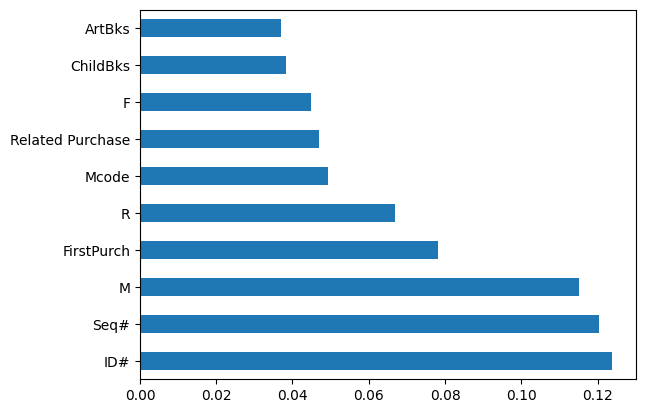

In [32]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [38]:
features = ['M', 'R', 'F', 'Related Purchase', 'ArtBks']
X = df[features]
y = df[['Florence']]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Create a Logistic Regression Classifier
lr = LogisticRegression()

# Create the GridSearchCV object for Logistic Regression
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5)

# Fit the GridSearchCV object to the data
grid_search_lr.fit(X_train, y_train)

# Get the best parameters
best_parameters_lr = grid_search_lr.best_params_

# Print the best parameters
print(f'Best parameters for Logistic Regression: {best_parameters_lr}')

# Train a new classifier using the best parameters
lr = LogisticRegression(**best_parameters_lr)
lr.fit(X_train, y_train)

# Make predictions and calculate accuracy
lr_predictions = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression accuracy: {lr_accuracy * 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best parameters for Logistic Regression: {'C': 0.001, 'penalty': 'l2'}
Logistic Regression accuracy: 92.25%


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

with logistic regression model it can be decided weather to send the mailing to the person and best parmeter used for triaining the model are Best parameters for Logistic Regression: {'C': 0.001, 'penalty': 'l2'}
Logistic Regression accuracy: 92.25%

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create a Decision Tree Classifier
dt = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_parameters = grid_search.best_params_

# Print the best parameters
print(f'Best parameters: {best_parameters}')

# Train a new classifier using the best parameters
dt = DecisionTreeClassifier(**best_parameters)
dt.fit(X_train, y_train)

# Make predictions and calculate accuracy
dt_predictions = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Decision Tree accuracy: {dt_accuracy * 100:.2f}%')


Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}
Decision Tree accuracy: 92.25%


with decision tree madel it can be decided weather to send the mailing to the person and best parmeter used for triaining the model are Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1} and the accuracy is 92.25%

In [49]:
# Define the parameter grid for K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance']
}

# Create a K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Create the GridSearchCV object for K-Nearest Neighbors
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5)

# Fit the GridSearchCV object to the data
grid_search_knn.fit(X_train, y_train)

# Get the best parameters
best_parameters_knn = grid_search_knn.best_params_

# Print the best parameters
print(f'Best parameters for K-Nearest Neighbors: {best_parameters_knn}')

# Train a new classifier using the best parameters
knn = KNeighborsClassifier(**best_parameters_knn)
knn.fit(X_train, y_train)

# Make predictions and calculate accuracy
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'K-Nearest Neighbors accuracy: {knn_accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Best parameters for K-Nearest Neighbors: {'n_neighbors': 8, 'weights': 'uniform'}
K-Nearest Neighbors accuracy: 92.25%


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

With K-Nearest Neighbors: {'n_neighbors': 8, 'weights': 'uniform'} we achieved accuracy of 92.25%, so we can cluster the data based on the features = ['M', 'R', 'F', 'Related Purchase', 'ArtBks'] and this cluster can be used to identify people with similar intrest and send mail them with similar interest

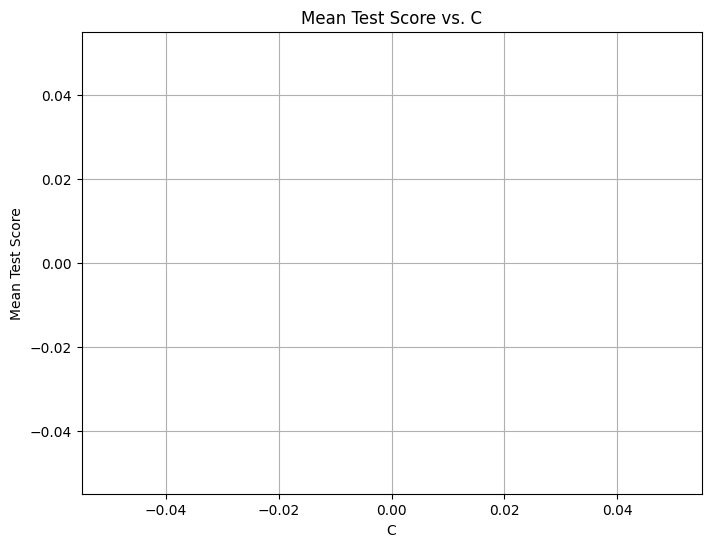

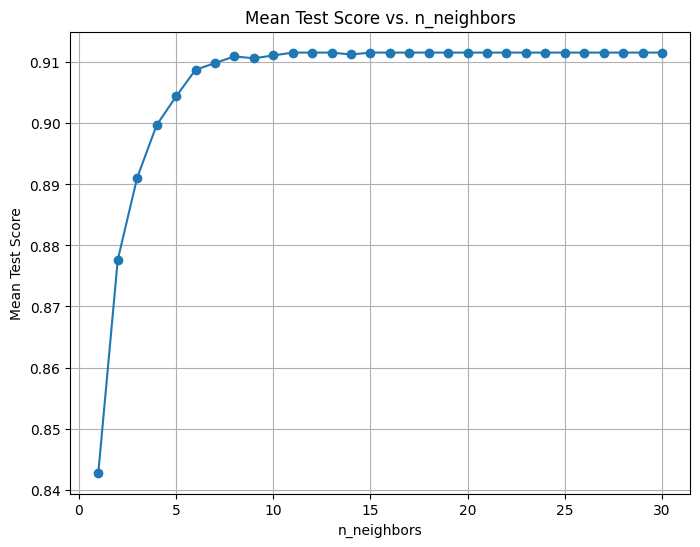

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid_search_results(grid_search, param_grid, param_name):
    # Get the mean test scores
    mean_test_scores = grid_search.cv_results_['mean_test_score']

    # Get the unique parameter values from the parameter grid
    param_values = param_grid[param_name]

    # If the lengths of mean_test_scores and param_values do not match,
    # reshape mean_test_scores to match the length of param_values
    if len(mean_test_scores) != len(param_values):
        mean_test_scores = mean_test_scores.reshape(len(param_values), -1).mean(axis=1)

    # Plot the mean test scores
    plt.figure(figsize=(8, 6))
    plt.plot(param_values, mean_test_scores, marker='o')
    plt.xlabel(param_name)
    plt.ylabel('Mean Test Score')
    plt.title(f'Mean Test Score vs. {param_name}')
    plt.grid(True)
    plt.show()

# Plot the mean test scores for each value of C for Logistic Regression
plot_grid_search_results(grid_search_lr, param_grid_lr, 'C')

# Plot the mean test scores for each value of n_neighbors for K-Nearest Neighbors
plot_grid_search_results(grid_search_knn, param_grid_knn, 'n_neighbors')

Best parameters for Decision Tree: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree: 0.91375


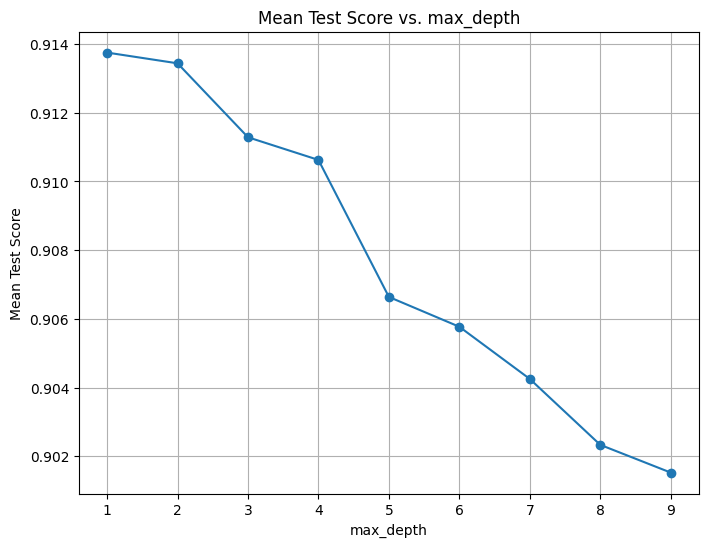

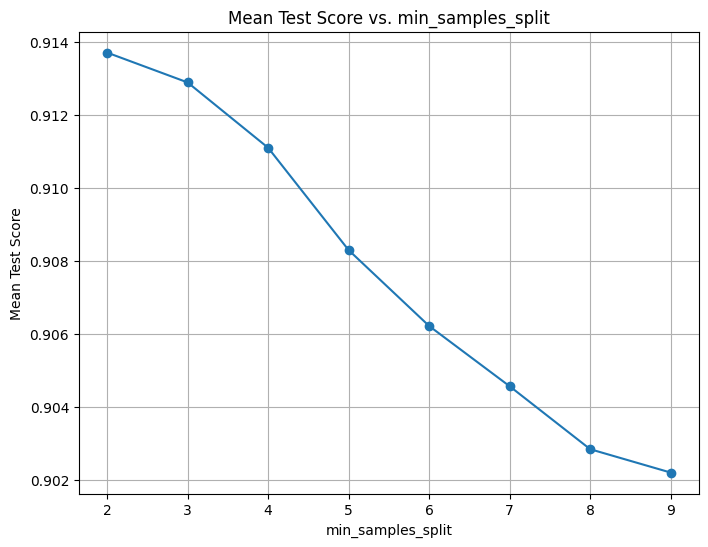

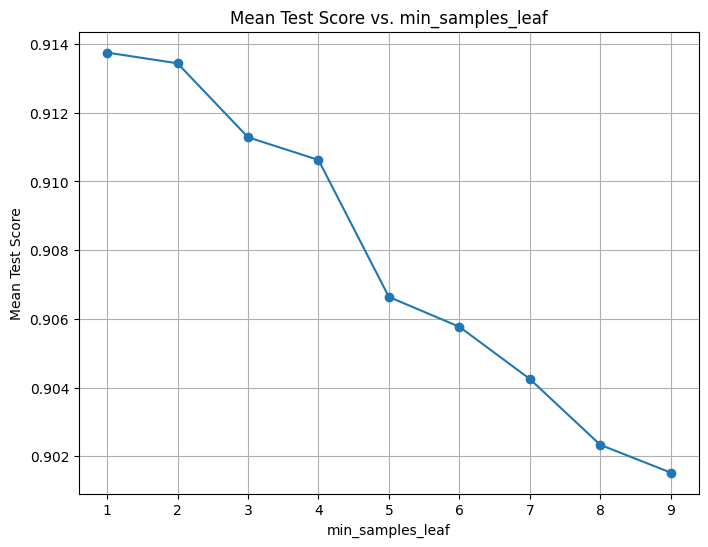

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the Decision Tree
param_grid_dt = {
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)
}

# Create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=1)

# Create the GridSearchCV object for the Decision Tree
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and the best score
print(f'Best parameters for Decision Tree: {grid_search_dt.best_params_}')
print(f'Best score for Decision Tree: {grid_search_dt.best_score_}')

# Plot the mean test scores for each value of max_depth
plot_grid_search_results(grid_search_dt, param_grid_dt, 'max_depth')

# Plot the mean test scores for each value of min_samples_split
plot_grid_search_results(grid_search_dt, param_grid_dt, 'min_samples_split')

# Plot the mean test scores for each value of min_samples_leaf
plot_grid_search_results(grid_search_dt, param_grid_dt, 'min_samples_leaf')
